## Importing Libraries

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2
import glob

## Image Arrays

In [17]:
# To read any normal image from any folders in the train dataset

def read_img(num1, num2): # num1 = folder number, num2 = image number
    num1 = str(num1)
    num2 = str(num2)+".png"
    img = cv2.imread("../becode_dice_data/train_set/"+num1+"/16_09_21_"+num1+"_"+num2,0)
    return img
    
img_00 = read_img('00','020')
img_01 = read_img('01','011')
img_02 = read_img('02', '011')
img_03 = read_img('03','000')
img_04 = read_img('04','040')
img_05 = read_img('05','011')
img_06 = read_img('06','000')

In [18]:
# To read any anomalous image from train dataset

def read_ano_img(num):
    num = str(num)
    img = cv2.imread("../becode_dice_data/train_set/ano/img_"+num+"_cropped.jpg",0)
    return img

In [19]:
img_ano = read_ano_img('29446')

In [20]:
# Creating a list with arrays of all the image pixels in each of the folder in the train set

def list_img(num):
    num = str(num)
    path_num = "C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\"+num
    list_num = []
    for filename in glob.iglob(f'{path_num}/*'):
        img = cv2.imread(filename, 0)
        list_num.append(img)
    return list_num

In [21]:
array_00 = np.array(list_img('00'))
array_01 = np.array(list_img('01'))
array_02 = np.array(list_img('02'))
array_03 = np.array(list_img('03'))
array_04 = np.array(list_img('04'))
array_05 = np.array(list_img('05'))
array_06 = np.array(list_img('06'))
array_07 = np.array(list_img('07'))
array_08 = np.array(list_img('08'))
array_09 = np.array(list_img('09'))
array_10 = np.array(list_img('10'))

## Templates

In [22]:
# Creating templates with the mean of each of the pixels in every folder of the train set

def template(num):
    num = str(num)
    t = np.mean(list_img(num), axis=0)
    return t

In [23]:
temp= {}
temp['00'] = template('00')
temp['01'] = template('01')
temp['02']= template('02')
temp['03'] = template('03')
temp['04'] = template('04')
temp['05'] = template('05')
temp['06'] = template('06')
temp['07'] = template('07')
temp['08'] = template('08')
temp['09'] = template('09')
temp['10'] = template('10')

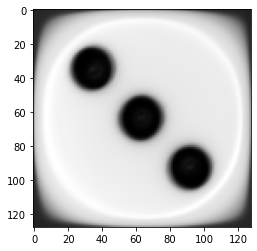

In [24]:
plt.imshow(temp['04'], cmap='gray')

## Method I
## Structural Similarity Index(SSIM)


In [25]:
# Computing the Structural Similarity Index (SSIM) between the two images 
# Ensuring that the difference image is returned

(score, diff) = structural_similarity(img_04, temp['04'], full=True)
diff = (diff * 255).astype("uint8")

# Printing the score
print("SSIM: {}".format(score))

SSIM: 0.8126876148789356


C:\Users\Nichelle Machado\.conda\envs\ComputerVision\lib\site-packages\skimage\_shared\utils.py:293: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [223]:
def ssim():
    # Source image paths
    path = "../becode_dice_data/train_set/02/16_09_21_02_037.png" # normal image path
    path_a="../becode_dice_data/train_set/ano/img_25229_cropped.jpg" # anomalous image path
    
    temp_num = ['00','01','02','03','04','05','06','07','08','09','10'] # templates to iterate through to find a similarity
    
    img = cv2.imread(path_a, 0) # reading the source image
    
    for n in temp_num:
        (score, diff) = structural_similarity(img, temp[n], full=True) # calculating the similarity score and differences
        diff = (diff * 255).astype("uint8")
        thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] # threshold
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # contours
        cnts = imutils.grab_contours(cnts)
       
        # Looping over the contours
        for c in cnts:
            # Computing the bounding box of the contour and then drawing the
            # Bounding box on both input images to represent where the two
            # Images differ
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(img_ano, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.rectangle(temp['04'], (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Showing the output images
            if score > 0.80:
                plt.figure(1, figsize=(12,4))
                result_1= print('Image similar to Template:',n,'\nScore:', score)
                i_1 =  plt.subplot(141),plt.imshow(img, cmap='gray')
                plt.title('Source Image')
                tp_1= plt.subplot(142),plt.imshow(temp[n], cmap='gray') 
                plt.title('Template')
                s_1 =  plt.subplot(143),plt.imshow(diff, cmap='gray')
                plt.title('Difference')
                t_1= plt.subplot(144),plt.imshow(thresh, cmap='gray') 
                plt.title('Threshold')
                return result_1, i_1,tp_1, s_1,t_1
            
            elif 0.70 < score < 0.80:
                plt.figure(1, figsize=(14,4))
                result= print('Image similar to Template:',n,'but anomalies found.','\nScore:',score)
                i =  plt.subplot(141),plt.imshow(img, cmap='gray')
                plt.title('Source Image')
                tp= plt.subplot(142),plt.imshow(temp[n], cmap='gray') 
                plt.title('Template')
                s =  plt.subplot(143),plt.imshow(diff, cmap='gray')
                plt.title('Difference')
                t= plt.subplot(144),plt.imshow(thresh, cmap='gray') 
                plt.title('Threshold')
                return result, i, tp, s, t
            
            else:
                continue
    return None

Image similar to Template: 05 but anomalies found. 
Score: 0.7922756544218873


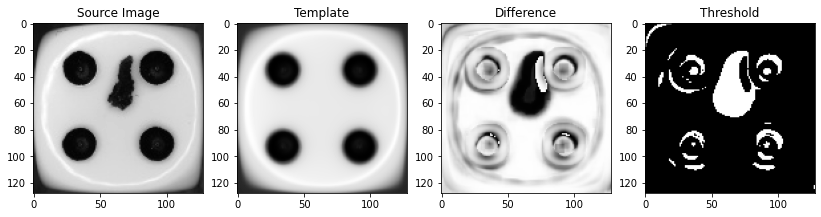

In [224]:
f = ssim()
if f is None:
    print('Image not matched/Anomalous')

## Method II
## Template Matching 

In [194]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def temp_match():
    # Source image paths
    path = "../becode_dice_data/train_set/02/16_09_21_02_011.png" # normal image path
    path_a="../becode_dice_data/train_set/ano/img_29446_cropped.jpg" # Anomalous image path
    path1 = "test_img_1.png" # external image path
    
    temp_num = ['00','01','02','03','04','05','06','07','08','09','10'] # Templates to iterate through to find a match
    
    for n in temp_num:
        img_read = cv2.imread(path, 0)
        img = img_read.astype('float32') # Source image
        template = temp[n].astype('float32') # Template image
        w, h = template.shape[::-1]
        w,h = (120,110)

        res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED) # Matching the template with the source image
        threshold = 0.84
        loc = np.where( res >= threshold)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2) # Draws a rectangle on the detected points
            cv2.imwrite('res.png',img)
            
            # Plotting the image and the template that it matches with
            plt.subplot(121),plt.imshow(template,cmap = 'gray')
            plt.title('Template Matched'), plt.xticks([]), plt.yticks([])
            plt.subplot(122),plt.imshow(img,cmap = 'gray')
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            plt.show()
            
            # Displaying the match rate and template number for matched images
            if res >= 0.94:
                match_rate = res[0][0]
                temp_n = n
                return print("Match rate=",match_rate, "Template number=", temp_n)
            elif 0.70 < res < 0.94:
                match_rate_1 = res[0][0]
                temp_n_1 = n
                return print("Slight anomalies found","\nMatch rate=",match_rate_1, "\nTemplate number=", temp_n_1)
            else:
                return print('Image not matched/Anomalous')
#     return None
    

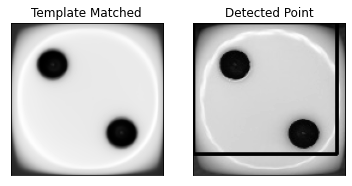

Match rate= 0.9817079 Template number= 02


In [195]:
test = temp_match()
test


### To test the match rate by entering the template number manually

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img_rgb = cv2.imread('images_dice_3.jpg')
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# img_invert = cv2.bitwise_not(img_gray)
img_t = cv2.imread('test_img_1.png',0) # Path to the test image(external)
img = img_t.astype('float32')
template = temp['06'].astype('float32') # Entering the template number
w, h = template.shape[::-1]
w,h = (120,110)

res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img)
res[0][0]

0.64888155

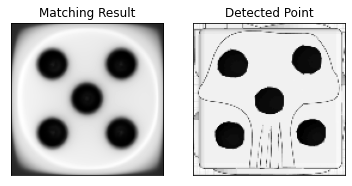

In [32]:
plt.subplot(121),plt.imshow(template,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

#### References:

* https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html
* https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html